# The code below will be used to find whether or not a tweet is offensive or not

In [1]:
import csv
import pandas as pd
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob

training_corpus = []
test_tweets = []
y_pred= []
y_true= []

with open('train.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        training_corpus.append((row['tweets'], row['Classification']))
        
with open('test_tweets.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        test_tweets.append((row['tweets']))    
        y_true.append((row['TRUE']))

model = NBC(training_corpus)
file = open("Predictions.txt", "w")
print("Prediction of test_tweets")
for tweet in test_tweets:
    pred=model.classify(tweet)
    file.write(pred+'\n') 
    print(pred)
    y_pred.append(pred)
file.close()

Prediction of test_tweets
Class_B
Class_A
Class_A
Class_A
Class_B
Class_A
Class_B
Class_B
Class_A
Class_B
Class_A
Class_B
Class_B
Class_A
Class_A
Class_A
Class_A
Class_B
Class_A
Class_A
Class_A
Class_B
Class_A
Class_A
Class_A
Class_B
Class_A
Class_A
Class_A
Class_A


# Confusion matrix and Classification report

In [3]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import Image
print(Image(filename='conf.png'))
print ('\nClasification report:\n', classification_report(y_true,y_pred))
print ('\nConfussion matrix:\n',confusion_matrix(y_true,y_pred))
with open("ConfusionMat+ClassRep.txt", 'w') as f:
    f.write('Confusion Matrix:')
    f.write('\n')
    f.write(np.array2string(confusion_matrix(y_true, y_pred), separator=', '))
    f.write('\n')
    f.write('Classification Report:')
    f.write('\n')
    f.write(classification_report(y_true,y_pred))
f.close()

<IPython.core.display.Image object>

Clasification report:
               precision    recall  f1-score   support

     Class_A       0.95      1.00      0.97        19
     Class_B       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30


Confussion matrix:
 [[19  0]
 [ 1 10]]


# This is just an example of linear regression

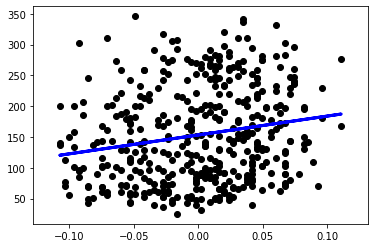

In [14]:
#Linear Regression example
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
oof=datasets.load_diabetes()
xTrain=oof.data[:-20]
yTrain=oof.target[:-20]
xTest=oof.data[:-20]
yTest=oof.target[:-20]

x0Test=xTest[:,0]
x0Train=xTrain[:,0]
x0Test= x0Test[:,np.newaxis]
x0Train= x0Train[:,np.newaxis]
linreg=linear_model.LinearRegression()
linreg.fit(x0Train, yTrain)
y=linreg.predict(x0Test)
plt.scatter(x0Test,yTest,color='k')
print(plt.plot(x0Test,y,color='b',linewidth=3))

# Graphs that will be used to show most common words in manefestoes

In [3]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
words = re.findall(r'\w+', open("PasoShooter.txt").read().lower())
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
count = Counter(words).most_common(50)
plt.rcParams["figure.figsize"] = (20,9)
df = pd.DataFrame(count, columns = ['Words', 'number of times used'])
df.plot.bar(x='Words',y='number of times used')
plt.title("Most Common words used in the El Paso Shooter's manifesto")

Text(0.5, 1.0, "Most Common words used in the El Paso Shooter's manifesto")

Text(0.5, 1.0, "Most Common words used in Dylann Roof's manifesto")

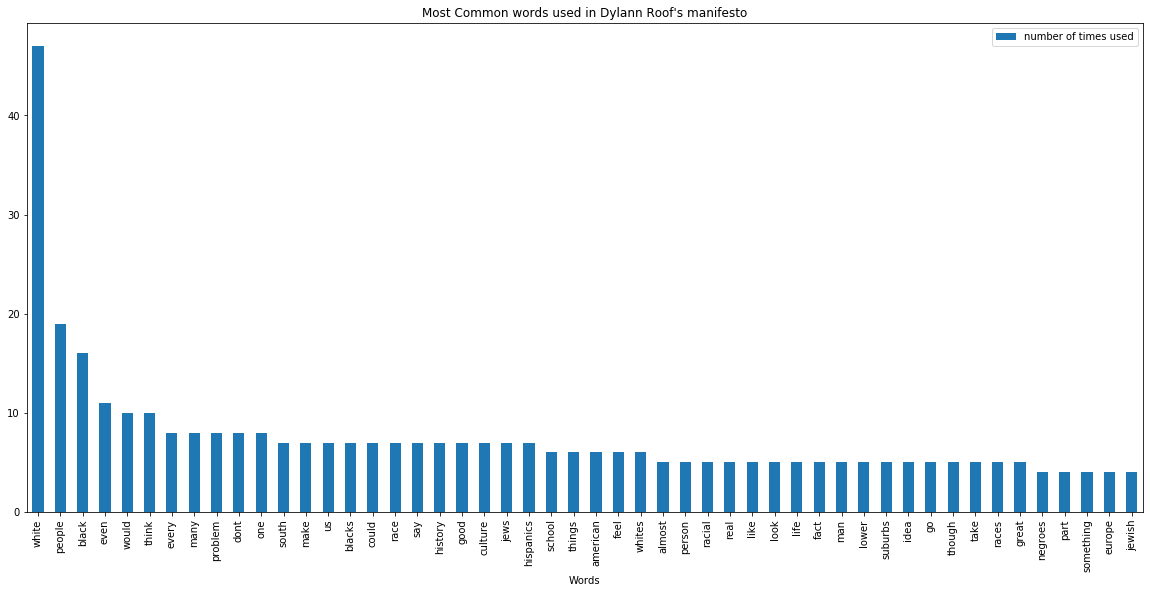

In [2]:
words = re.findall(r'\w+', open("Dylan Roof.txt").read().lower())
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
count = Counter(words).most_common(50)
plt.rcParams["figure.figsize"] = (20,9)
df = pd.DataFrame(count, columns = ['Words', 'number of times used'])
df.plot.bar(x='Words',y='number of times used')
plt.title("Most Common words used in Dylann Roof's manifesto")

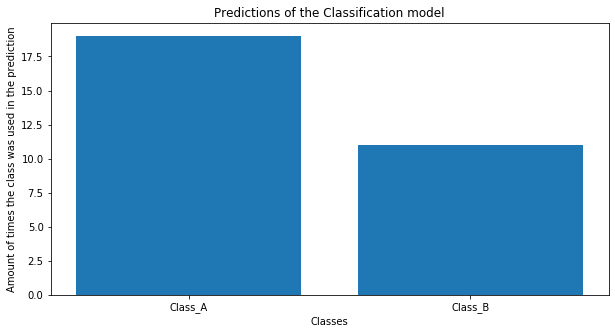

In [4]:
import numpy as np
objects = ('Class_A', 'Class_B')
y_pos = np.arange(len(objects))
performance = [19,11]
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.xlabel('Classes')
plt.ylabel('Amount of times the class was used in the prediction')
plt.title('Predictions of the Classification model')
plt.show()

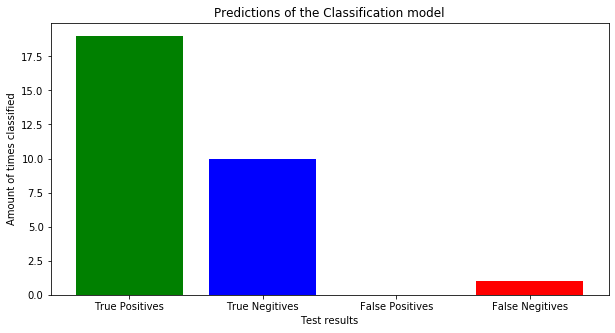

In [5]:
objects = ('True Positives', 'True Negitives', 'False Positives','False Negitives')
y_pos = np.arange(len(objects))
performance = [19,10,0,1]
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(y_pos, performance, align='center', alpha=1,color=['green', 'blue', 'cyan','red'])
plt.xticks(y_pos, objects)
plt.xlabel('Test results')
plt.ylabel('Amount of times classified')
plt.title('Predictions of the Classification model')
plt.show()

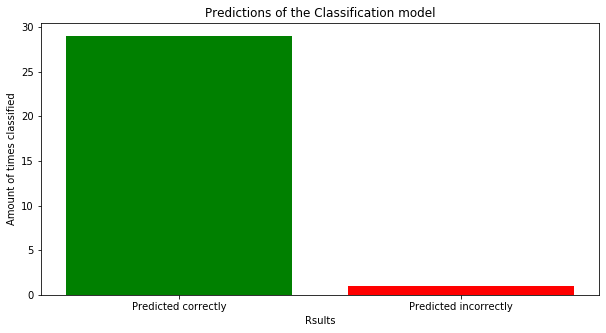

In [8]:
objects = ('Predicted correctly', 'Predicted incorrectly')
y_pos = np.arange(len(objects))
performance = [29,1]
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(y_pos, performance, align='center', alpha=1,color=['green','red'])
plt.xticks(y_pos, objects)
plt.xlabel('Rsults')
plt.ylabel('Amount of times classified')
plt.title('Predictions of the Classification model')
plt.show()

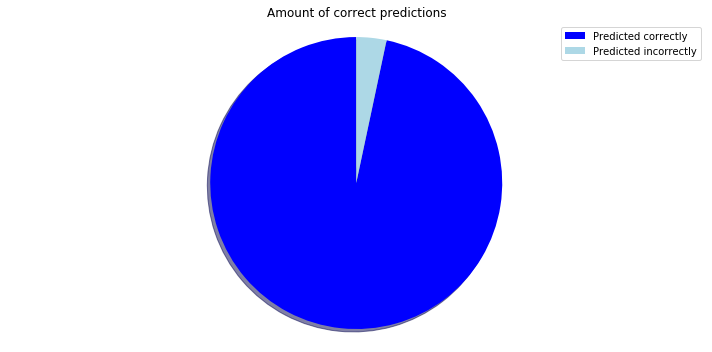

In [29]:
import matplotlib.pyplot as plt
labels = 'Predicted correctly', 'Predicted incorrectly'
sizes = [29,1]
colors = ['blue', 'lightblue']
plt.title('Amount of correct predictions')
patches, texts = plt.pie(sizes,colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()